필요한 라이브러리 모듈 가져오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

1년동안 사용한 전기 사용량 데이터(월단위) 

In [2]:
train_t = np .array([127, 129, 130, 137, 135, 146, 157, 162, 158, 152, 155, 144])
train_t = train_t.reshape([12,1])

* 1년동안 사용한 전기량 데이터 그래프

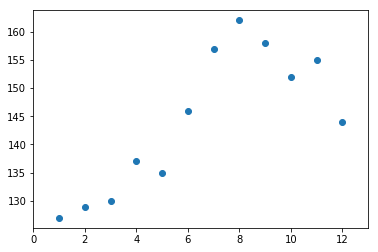

In [3]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(0,13)
subplot.scatter(range(1,13), train_t)

학습을 위한 x 데이터를 넣을 배열 선언(12개월 데이터로 구성)

In [4]:
train_x = np.zeros([12,5])
print (train_x)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Placeholder로 트레이닝 월별 데이터 선언

In [5]:
x = tf.placeholder(tf.float32, [None,5])

최적화 파리미터 변수 선언

In [6]:
w = tf.Variable(tf.zeros([5,1]))
print (w)

<tf.Variable 'Variable:0' shape=(5, 1) dtype=float32_ref>


Placeholder로 해당월의 실제 사용량 선언

In [7]:
t = tf.placeholder(tf.float32,[None,1])
print (t)

Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


**1단계 수식작성** 수식에 의해 계산된 결과값(수식에 의한 예측된 전기사용량)
> * tf.matmul(a,b) : a * b 

In [8]:
y = tf.matmul(x,w)
print (y)

Tensor("MatMul:0", shape=(?, 1), dtype=float32)


**2단계 오차함수 작성**
> * tf.square(x) : x를 제곱함, x*x = x^2
> * tf.reduce_sum() : 텐서의 차원에서 요소들의 합

In [9]:
# 오차 제곱의 합
#costFunction = tf.reduce_sum(tf.square(y-t))
#오차 제곱의 평균
costFunction = tf.reduce_mean(tf.square(y-t))

**3단계 최적화 과정을 통해 파라미터 값을 결정 **
> tf.train.GradientDescentOptimizer(learning_rate = 0.1)
> * learning_rate : 학습속도 (기본값 0.1)

> tf.train.AdamOptimizer(learning_rate = 0.001)
> * learning_rate : 학습속도 (기본값 0.001)

> 최적화 알고리즘 참고 자료 : http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html

In [10]:
trainOptimizer = tf.train.AdamOptimizer(learning_rate = 0.002)
#trainOptimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1) 
train = trainOptimizer.minimize(costFunction)

세션 정의 및 변수 초기화

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#with tf.Session() as sess:
#    sess.run(tf.global_variables_initializer())

학습을 위한 x 데이터 값 생성

In [12]:
for row, month in enumerate(range(1,13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n
        print ("(",row,",",col,")\t",month,"\t",n,"\t","month ^ n = ",train_x[row][col])

( 0 , 0 )	 1 	 0 	 month ^ n =  1.0
( 0 , 1 )	 1 	 1 	 month ^ n =  1.0
( 0 , 2 )	 1 	 2 	 month ^ n =  1.0
( 0 , 3 )	 1 	 3 	 month ^ n =  1.0
( 0 , 4 )	 1 	 4 	 month ^ n =  1.0
( 1 , 0 )	 2 	 0 	 month ^ n =  1.0
( 1 , 1 )	 2 	 1 	 month ^ n =  2.0
( 1 , 2 )	 2 	 2 	 month ^ n =  4.0
( 1 , 3 )	 2 	 3 	 month ^ n =  8.0
( 1 , 4 )	 2 	 4 	 month ^ n =  16.0
( 2 , 0 )	 3 	 0 	 month ^ n =  1.0
( 2 , 1 )	 3 	 1 	 month ^ n =  3.0
( 2 , 2 )	 3 	 2 	 month ^ n =  9.0
( 2 , 3 )	 3 	 3 	 month ^ n =  27.0
( 2 , 4 )	 3 	 4 	 month ^ n =  81.0
( 3 , 0 )	 4 	 0 	 month ^ n =  1.0
( 3 , 1 )	 4 	 1 	 month ^ n =  4.0
( 3 , 2 )	 4 	 2 	 month ^ n =  16.0
( 3 , 3 )	 4 	 3 	 month ^ n =  64.0
( 3 , 4 )	 4 	 4 	 month ^ n =  256.0
( 4 , 0 )	 5 	 0 	 month ^ n =  1.0
( 4 , 1 )	 5 	 1 	 month ^ n =  5.0
( 4 , 2 )	 5 	 2 	 month ^ n =  25.0
( 4 , 3 )	 5 	 3 	 month ^ n =  125.0
( 4 , 4 )	 5 	 4 	 month ^ n =  625.0
( 5 , 0 )	 6 	 0 	 month ^ n =  1.0
( 5 , 1 )	 6 	 1 	 month ^ n =  6.0
( 5 , 2 )	 6 	 2

100,000번의 학습 과정을통해 손실 값 출력

In [13]:
itrNum = 0
for _ in range(100000) :
    itrNum = itrNum + 1
    trainValue,costFunctionValue = sess.run([train, costFunction],feed_dict = {x: train_x, t : train_t})
    if (itrNum % 10000 == 0) :
        print ("Step : %d, cost(loss) : %f " %(itrNum, costFunctionValue))    

Step : 10000, cost(loss) : 1114.788086 
Step : 20000, cost(loss) : 570.025330 
Step : 30000, cost(loss) : 247.058395 
Step : 40000, cost(loss) : 93.037254 
Step : 50000, cost(loss) : 37.191383 
Step : 60000, cost(loss) : 30.781759 
Step : 70000, cost(loss) : 26.528708 
Step : 80000, cost(loss) : 25.322325 
Step : 90000, cost(loss) : 27.862867 
Step : 100000, cost(loss) : 23.185396 


다시한번 100,000번의 학습 과정을통해 손실 값 출력

In [14]:
itrNum = 0
for _ in range(100000):
    itrNum = itrNum + 1
    trainValue,costFunctionValue = sess.run([train, costFunction],feed_dict = {x: train_x, t : train_t})
    if (itrNum % 10000 == 0) :
        print ("Step : %d, cost(loss) : %f " %(itrNum, costFunctionValue))    

Step : 10000, cost(loss) : 22.220343 
Step : 20000, cost(loss) : 21.454903 
Step : 30000, cost(loss) : 20.515131 
Step : 40000, cost(loss) : 22.228760 
Step : 50000, cost(loss) : 19.054218 
Step : 60000, cost(loss) : 18.403078 
Step : 70000, cost(loss) : 17.800215 
Step : 80000, cost(loss) : 17.260216 
Step : 90000, cost(loss) : 16.728636 
Step : 100000, cost(loss) : 19.628031 


학습을 통해 결정된 w파라미터 값 확인

In [15]:
wValue = sess.run(w)
print (wValue)

[[ 1.1502965e+02]
 [ 1.0829709e+01]
 [-2.5900218e+00]
 [ 3.9013070e-01]
 [-1.9651623e-02]]


학습된 모델 그래프 

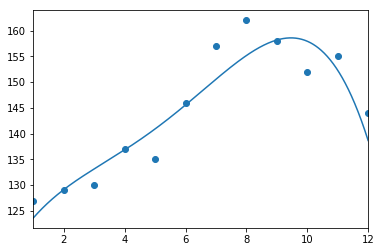

In [16]:
def predict(x) :
    result = 0.0
    for n in range(0,5):
        result +=wValue[n][0] * x**n
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,1000)
liney = predict(linex)
subplot.plot(linex, liney)